<a href="https://colab.research.google.com/github/munisai2/Analysis-on-Uber-and-Lyft/blob/main/DBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection  import SelectKBest,chi2
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
cab=pd.read_csv("cab_rides.csv")


In [ ]:
cab.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


##Data cleaning

In [ ]:
cab.shape

(693071, 10)

In [ ]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [ ]:
cab.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [ ]:
cab['price'].mean()
cab['price'].mode()
cab.median()

16.545125490614065

In [ ]:
cab


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#cab.fillna(cab.mode())

In [ ]:
cab.dropna(inplace=True)

In [ ]:
cab.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,637976.0,2.189261e+00,1.135413e+00,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
time_stamp,637976.0,1.544046e+12,6.892028e+08,1.543204e+12,1.543444e+12,1.543737e+12,1.544828e+12,1.545161e+12
price,637976.0,1.654513e+01,9.324359e+00,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
surge_multiplier,637976.0,1.015068e+00,9.542184e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [ ]:
categorical_feature = cab.dtypes==object
final_categorical_feature = cab.columns[categorical_feature].tolist()

##visualisation

7.00     52314
16.50    44351
10.50    40590
13.50    33707
9.00     30884
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: price, Length: 147, dtype: int64

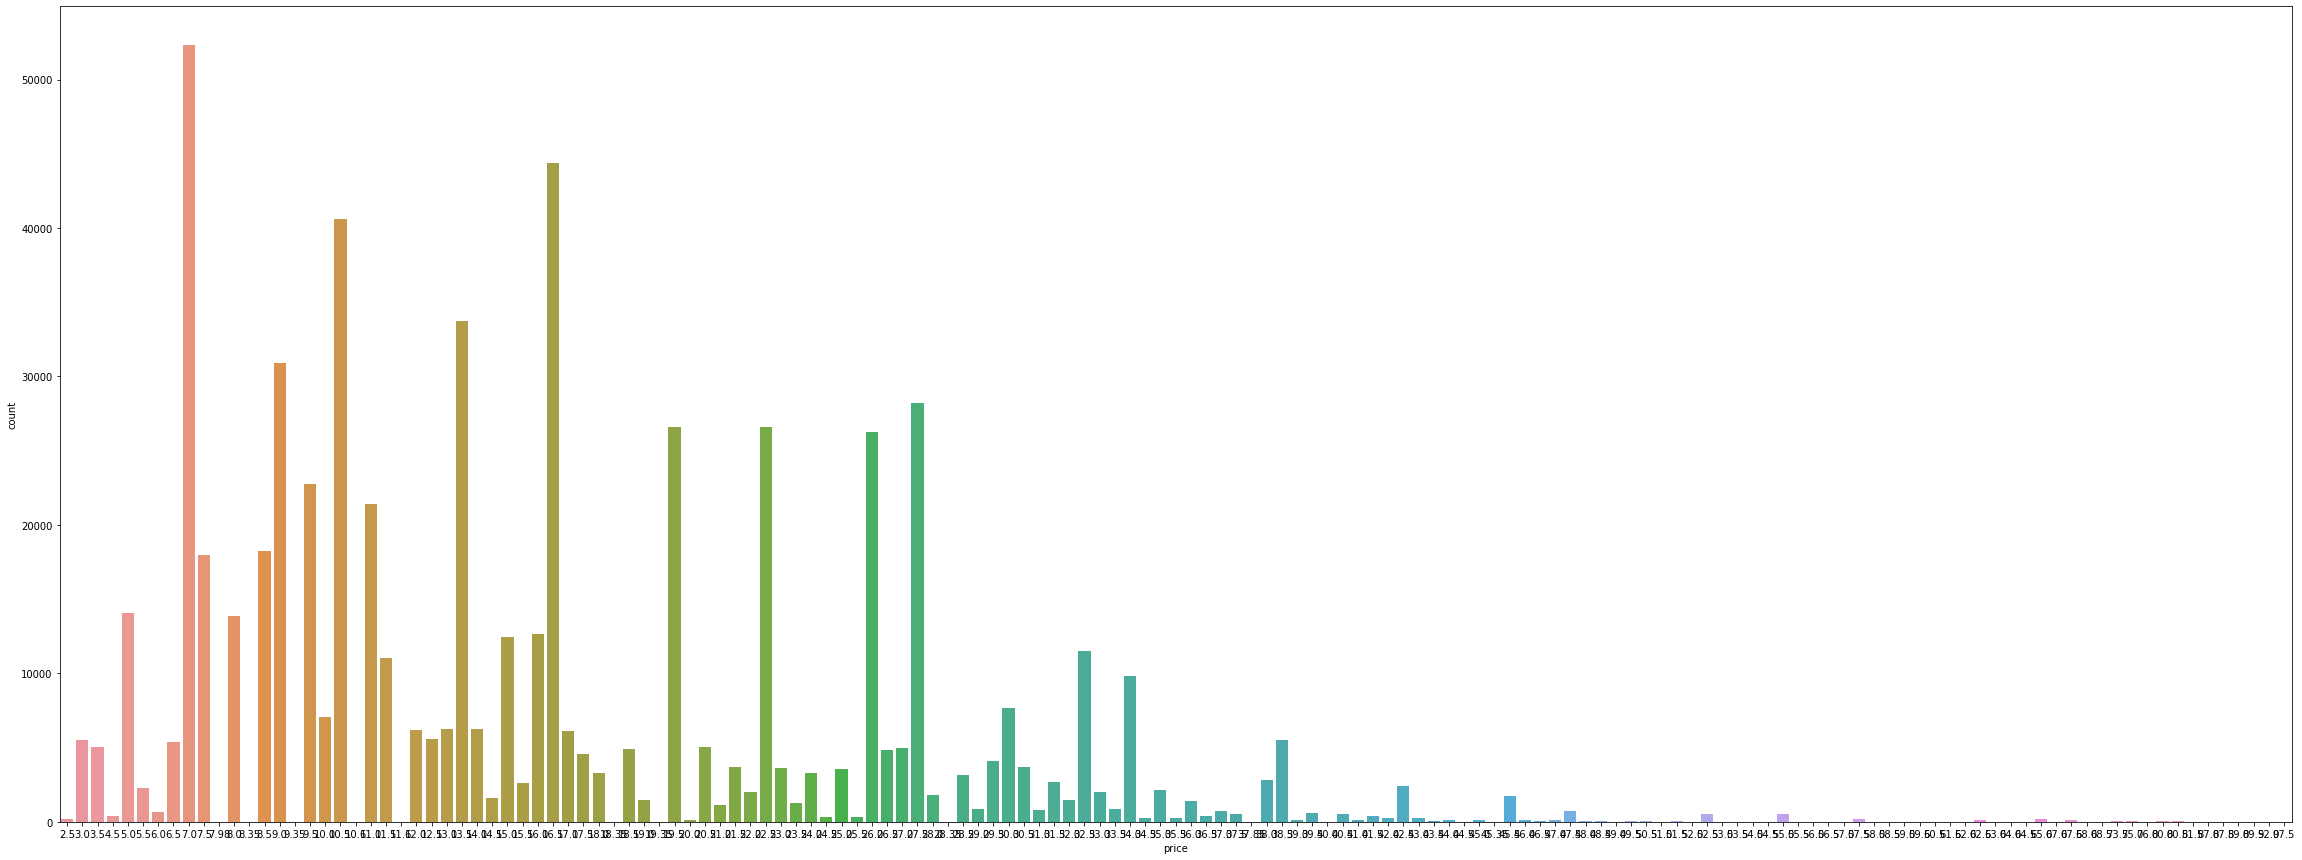

In [ ]:
plt.figure(figsize=(40, 15))
sns.countplot(x = "price", data = cab)
cab.loc[:, 'price'].value_counts()

1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

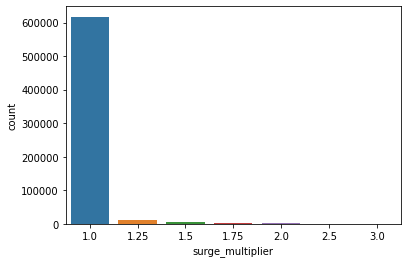

In [ ]:

sns.countplot(x='surge_multiplier', data = cab)
cab.loc[:, 'surge_multiplier'].value_counts()

Graphs for Numerical columns 

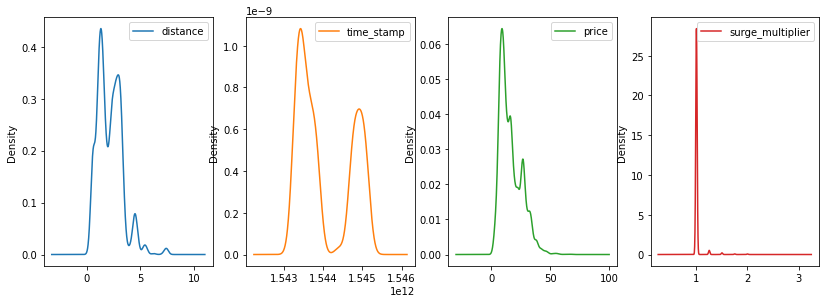

In [ ]:
final_numeric_feature = ['distance', 'time_stamp', 'price', 'surge_multiplier']
cab[final_numeric_feature].plot(kind='density', subplots=True, layout=(6,9), sharex=False, figsize= (32,32))
plt.show()

Graphs for Categorical columns

In [ ]:
final_categorical_feature_1=['cab_type','destination','source','product_id','name','location']

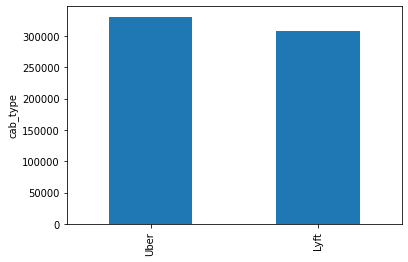

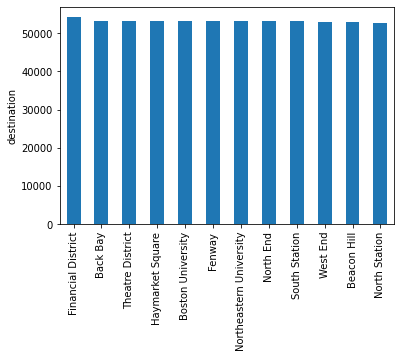

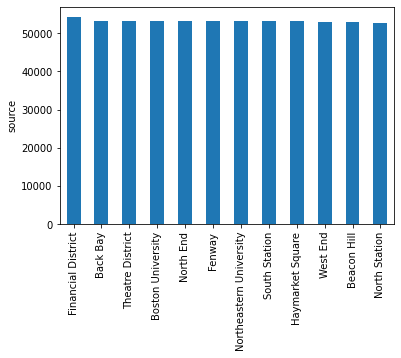

In [ ]:
for i in range(len(final_categorical_feature_1)):
    cab[final_categorical_feature[i]].value_counts().plot(kind='bar')
    plt.xticks(rotation='vertical')
    plt.ylabel(final_categorical_feature[i])
    plt.show()

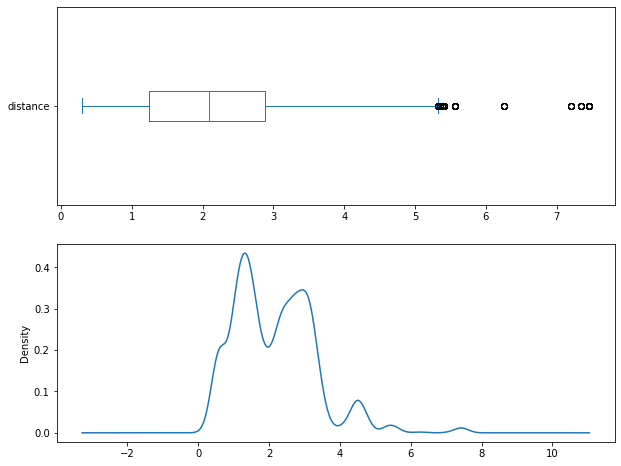

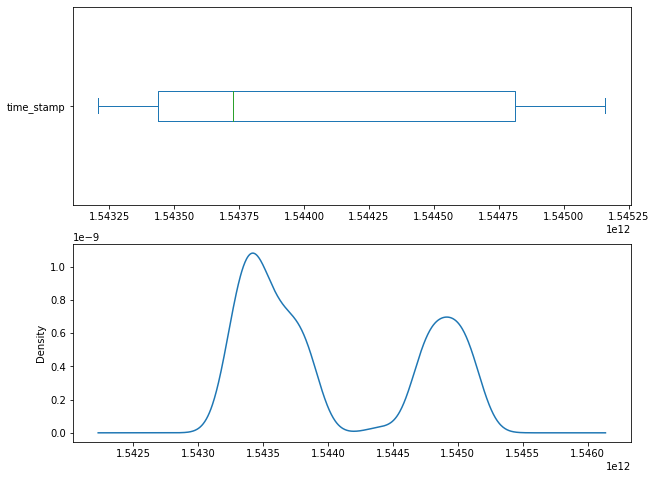

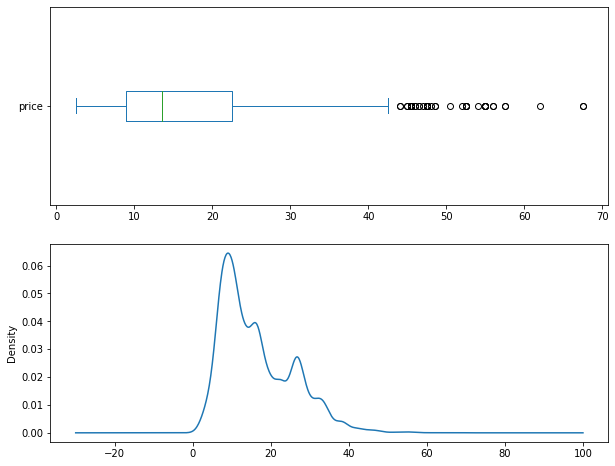

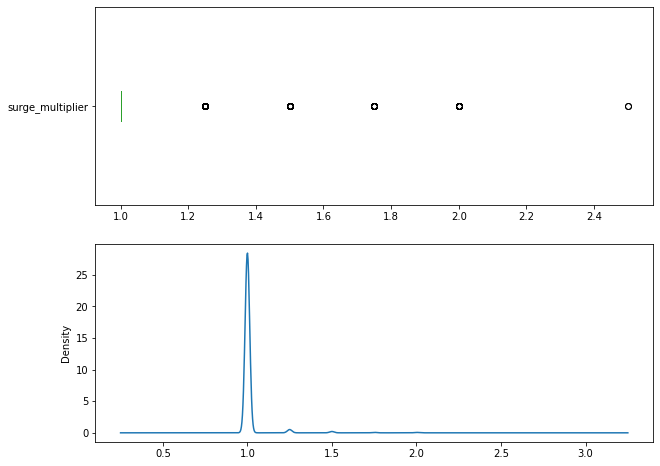

In [ ]:
def preprocess(data, col):
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    data[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    data[col].plot(kind='density', subplots=True, sharex=False)
    plt.show()
for i in range(len(final_numeric_feature)):
    preprocess(cab[final_numeric_feature], final_numeric_feature[i])

In [ ]:
for column in final_numeric_feature:
    sns.boxplot(cab[column])
    plt.show()

<Figure size 2160x2160 with 0 Axes>

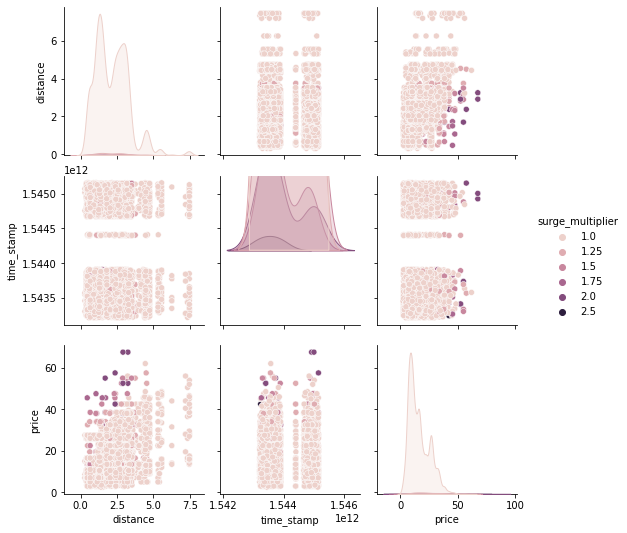

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(cab,hue='surge_multiplier')

##descriptive analysis

In [ ]:
cab.mean()
cab.mode()
cab.median()

In [ ]:
cab.medain()

In [ ]:
cab.mode()

NameError: ignored

In [ ]:
cab['price'].mean()
cab['price'].mode()
cab.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


distance            2.160000e+00
time_stamp          1.543737e+12
price               1.350000e+01
surge_multiplier    1.000000e+00
dtype: float64

In [ ]:
cab.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


taking data with specified columns

In [ ]:
cab_data = cab[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name']]

cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [ ]:
cab_data["rounded_timestamp"] = cab_data["time_stamp"] / 1000
cab_data["rounded_timestamp"] = cab_data["rounded_timestamp"].apply(np.floor)

cab_data["date"] = cab_data["rounded_timestamp"].apply(lambda x : datetime.datetime.fromtimestamp(x).date())
cab_data["time"] = cab_data["rounded_timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x).time())
cab_data['weekday'] = cab_data['date'].apply(lambda x: x.weekday())
cab_data["weekday"] = cab_data["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
cab_data['hour'] = cab_data['time'].apply(lambda time: time.hour)

cab_data.loc[(cab_data.hour >= 6) & (cab_data.hour < 12) , 'time_of_day'] = 'Morning'
cab_data.loc[(cab_data.hour >= 12) & (cab_data.hour < 15) , 'time_of_day'] = 'Afternoon'
cab_data.loc[(cab_data.hour >= 15) & (cab_data.hour < 18) , 'time_of_day'] = 'Evening'
cab_data.loc[(cab_data.hour >= 18) | (cab_data.hour < 6) , 'time_of_day'] = 'Night'

cab_df = cab_data[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cab_data["time_stamp"]

0         1544952607890
1         1543284023677
2         1543366822198
3         1543553582749
4         1543463360223
              ...      
693066    1543708385534
693067    1543708385534
693068    1543708385534
693069    1543708385534
693070    1543708385534
Name: time_stamp, Length: 693071, dtype: int64

In [ ]:
cab_data['cab_type'].value_counts()

Uber    4431
Lyft    3790
Name: cab_type, dtype: int64

## individual analysis


In [ ]:
uber_data = cab_data[cab_data['cab_type'] =="Uber"]
lyft_data = cab_data[cab_data['cab_type'] =="Lyft"]

In [ ]:
lyft_data = cab_data[cab_data["cab_type"] == "Lyft"]
uber_data = cab_data[cab_data['cab_type'] == "Uber"]

uber_corr = uber_data[["distance", "price", "surge_multiplier"]]
lyft_corr = lyft_data[["distance", "price", "surge_multiplier"]]

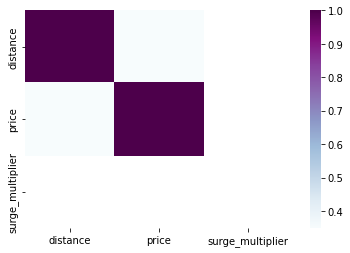

In [ ]:
sns.heatmap(uber_corr.corr(),cmap="BuPu")

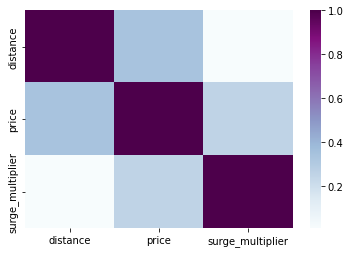

In [ ]:
sns.heatmap(lyft_corr.corr(),cmap="BuPu")

In [ ]:

uber_corr = uber_data[["distance", "price", "surge_multiplier","cab_type","time_stamp","destination","source","name"]]
lyft_corr = lyft_data[["distance", "price", "surge_multiplier","cab_type","time_stamp","destination","source","name"]]

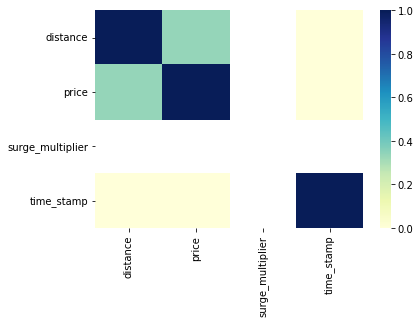

In [ ]:
sns.heatmap(uber_corr.corr(),cmap="YlGnBu")

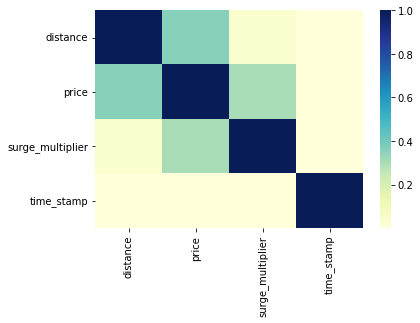

In [ ]:
sns.heatmap(lyft_corr.corr(),cmap="YlGnBu")

In [ ]:
uber_data["surge_multiplier"].value_counts()
lyft_data["surge_multiplier"].value_counts()

1.00    3547
1.25     145
1.50      58
1.75      20
2.00      18
2.50       2
Name: surge_multiplier, dtype: int64

In [ ]:
high_surge_dataset = lyft_data[lyft_data["surge_multiplier"]> 1]

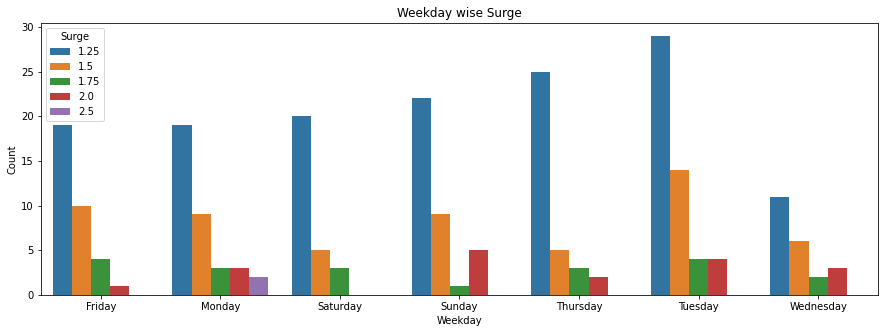

In [ ]:
t_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["Weekday", "Surge", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title("Weekday wise Surge");

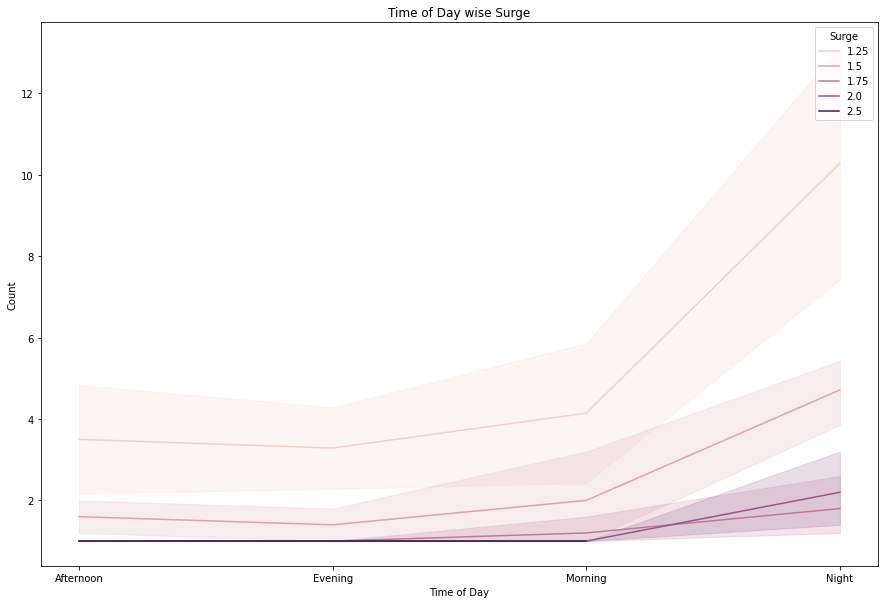

In [ ]:
td_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier","time_of_day"]).size().reset_index())
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]

plt.figure(figsize=(15, 10))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title("Time of Day wise Surge");

In [ ]:
uber_dis_price_surge = uber_data[['distance', 'surge_multiplier', 'price']]
lyft_dis_price_surge = lyft_data[['distance', 'surge_multiplier', 'price']]

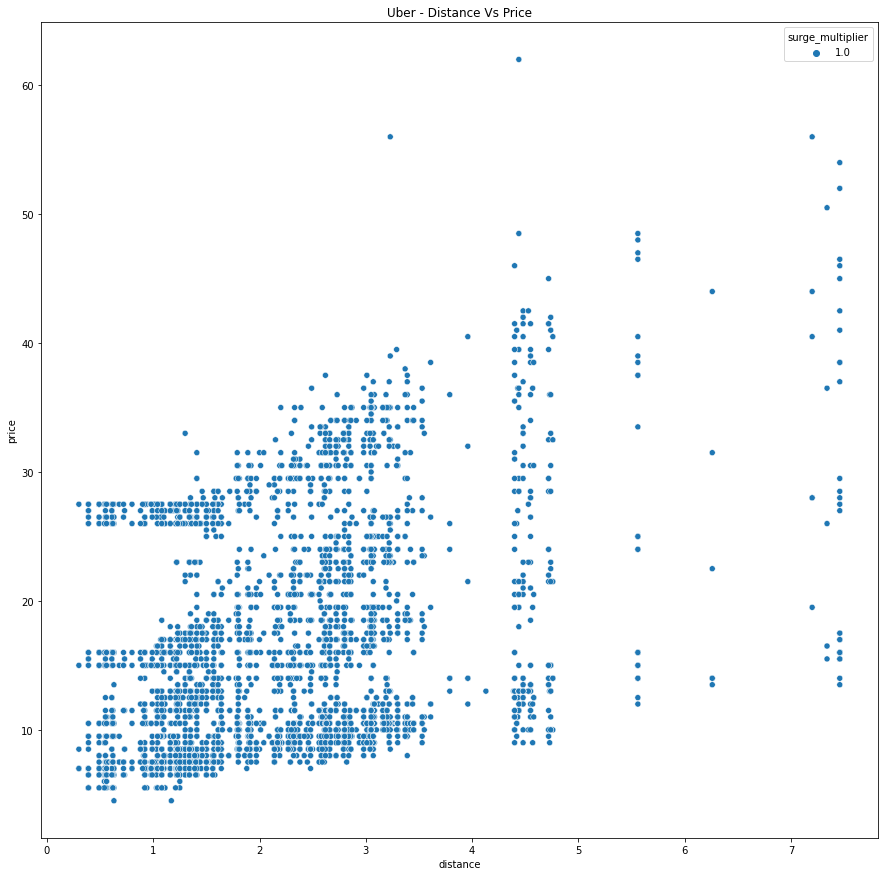

In [ ]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=uber_dis_price_surge, x="distance", y="price", hue="surge_multiplier").set_title("Uber - Distance Vs Price");

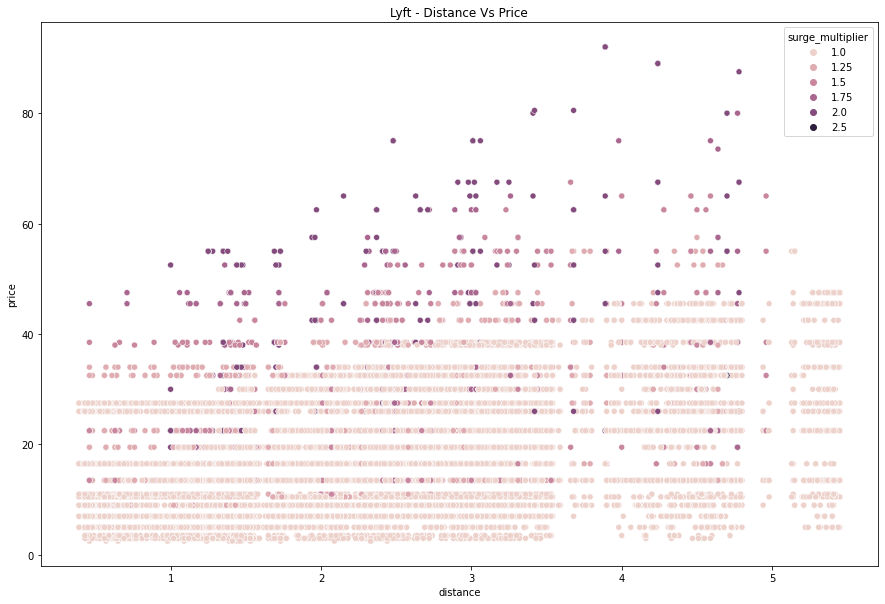

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=lyft_dis_price_surge, x="distance", y="price", hue="surge_multiplier").set_title("Lyft - Distance Vs Price");

#for uber

In [ ]:
uber_s_d_df= uber_data.groupby(['source', "destination"]).size().reset_index()
uber_s_d_df.columns = ["source", "destination", "count"]
uber_s_d_df.sort_values("count", inplace=True, ascending = False)
uber_five_most = uber_s_d_df.iloc[0:5, ]
uber_five_most["Source - Destination"] = uber_s_d_df["source"] + " - " + uber_s_d_df["destination"]

# So the top five most Source - Destination for Uber
uber_five_most = uber_five_most[["Source - Destination", "count"]]
uber_five_most

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Source - Destination,count
43,North Station - Fenway,146
18,Fenway - Back Bay,107
28,Financial District - Northeastern University,102
39,North End - North Station,97
3,Back Bay - North End,95


#for lyft

In [ ]:
lyft_s_d_df= lyft_data.groupby(['source', "destination"]).size().reset_index()
lyft_s_d_df.columns = ["source", "destination", "count"]
lyft_s_d_df.sort_values("count", inplace=True, ascending = False)
lyft_five_most = lyft_s_d_df.iloc[0:5, ]
lyft_five_most["Source - Destination"] = lyft_s_d_df["source"] + " - " + lyft_s_d_df["destination"]

# So the top five most Source - Destination for lyft
lyft_five_most = lyft_five_most[["Source - Destination", "count"]]
lyft_five_most

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Source - Destination,count
56,South Station - Financial District,91
6,Beacon Hill - Boston University,89
70,West End - Northeastern University,86
64,Theatre District - Northeastern University,82
52,Northeastern University - Theatre District,81


Which destinations attract more surge and which are least
Here we pick only those rows which have surge greater than or equal to 2

In [ ]:
high_surge_rows = cab_df[cab_df["surge_multiplier"] >= 2]
loc_wise_surge = high_surge_rows.groupby(["source", "destination"]).size().reset_index()

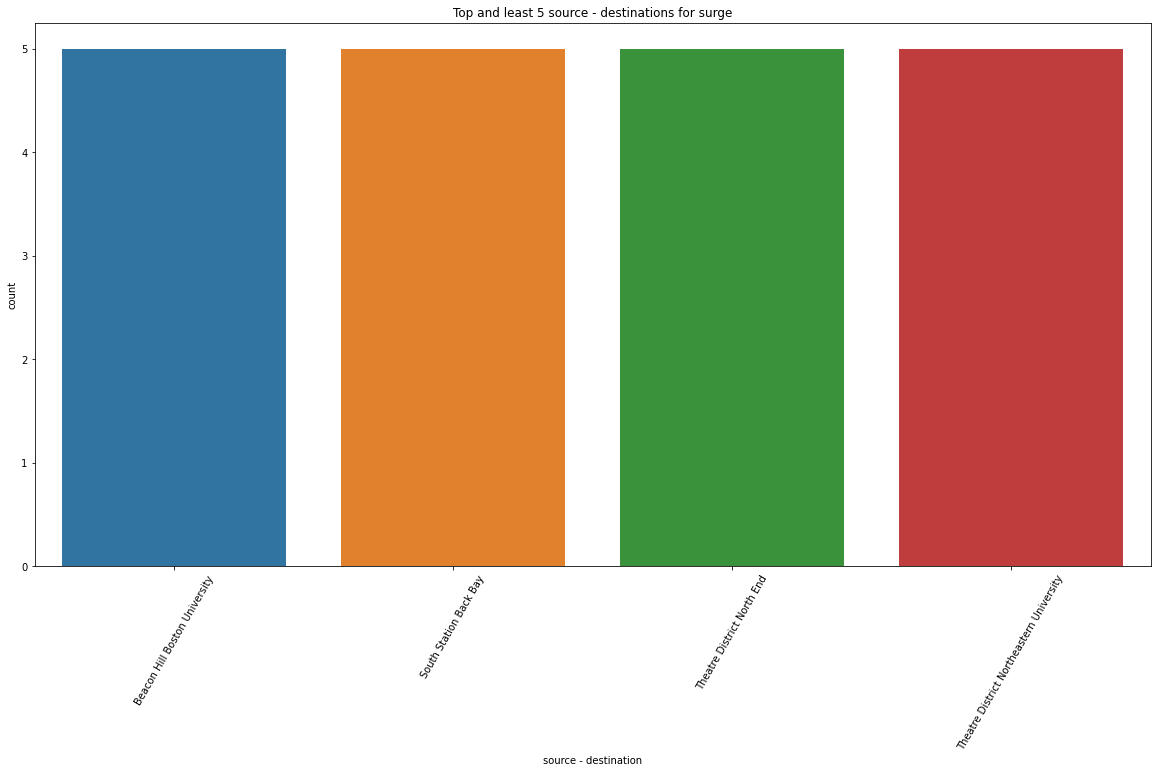

In [ ]:
loc_wise_surge.columns=["source", "destination", "count"]
loc_wise_surge.sort_values(inplace=True, ascending=False, by=["count"])


highest_destination_surge = loc_wise_surge.head(5)
lowest_destination_surge = loc_wise_surge.tail(5)
# highest_destination_surge
destination_surge_df = highest_destination_surge.append(lowest_destination_surge, ignore_index=True)
destination_surge_df["source - destination"] = destination_surge_df["source"] + " " + destination_surge_df["destination"]
plt.figure(figsize=(20, 10))
g = sns.barplot(data = destination_surge_df, x = "source - destination", y = "count")
g.set_title("Top and least 5 source - destinations for surge")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=60);

###shared rides

In [ ]:
lyft_data["name"].value_counts()

Shared          8449
Lyft            8288
Lux Black XL    8219
Lux Black       8216
Lyft XL         8168
Lux             8055
Name: name, dtype: int64

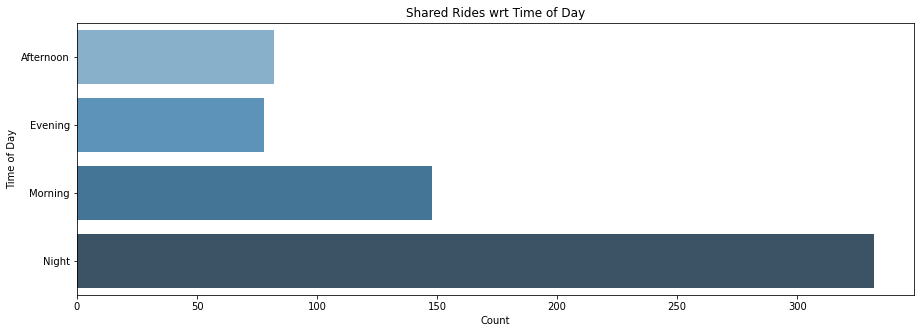

In [ ]:
lyft_shared_rides_df = lyft_data[lyft_data["name"] == "Shared"]
lyft_shared_ride_td = lyft_shared_rides_df.groupby(["name", "time_of_day"]).size().reset_index()
lyft_shared_ride_td.columns = ["Name", "Time of Day", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(y="Time of Day", x="Count", data=lyft_shared_ride_td, palette="Blues_d", orient ='h' ).set_title("Shared Rides wrt Time of Day");

In [ ]:
lyft_shared_rides_distance_price = lyft_shared_rides_df.groupby(["name", "distance", "price"]).size().reset_index()
lyft_shared_rides_distance_price.columns = ["name", "distance", "price", "count"]

In [ ]:
lyft_shared_rides_distance_price

,name,distance,price,count
0,Shared,0.39,5.0,2
1,Shared,0.40,5.0,2
2,Shared,0.42,5.0,4
3,Shared,0.43,3.0,6
4,Shared,0.43,3.5,6
...,...,...,...,...
1250,Shared,5.42,10.5,13
1251,Shared,5.42,11.0,3
1252,Shared,5.44,5.0,3
1253,Shared,5.45,5.0,1


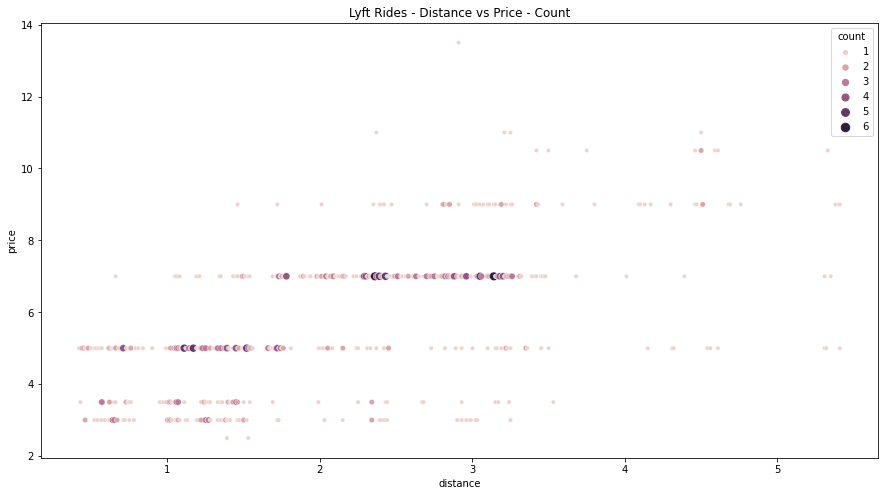

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = lyft_shared_rides_distance_price, x = "distance", y="price", hue="count", size="count").set_title("Lyft Rides - Distance vs Price - Count");

forecasting prices

In [ ]:
dist_uber=(uber_data.distance)
dist_lyft= lyft_data.distance

price_uber=uber_data.price
price_lyft =lyft_data.price

time_uber =uber_data.time_stamp
time_lyft =lyft_data.time_stamp

NameError: ignored

In [ ]:
dist_uber_unique =sorted(dist_uber.unique())
dist_lyft_unique =sorted(dist_lyft.unique())

dividing data sets into four parts for both uber and lyft

In [ ]:
Dict_uber ={'Distance': dist_uber,'price': price_uber,'time':time_uber }


In [ ]:
Dict_uber1={'Distance':Uber_00to06_distance,'Price':Uber_00to06_price}

next part

understanding with weather

In [ ]:
cab=pd.read_csv("cab_rides.csv")
weather=pd.read_csv("weather.csv")

In [ ]:
cab["time_stamp"] = cab["time_stamp"] / 1000
cab["time_stamp"] = cab["time_stamp"].apply(np.floor)

In [ ]:
cab["time_stamp"] = cab["time_stamp"].astype(int)
weather.columns = ['temp', 'source', 'clouds', 'pressure', 'rain', 'time_stamp', 'humidity', 'wind']
weather.isnull().sum()

temp             0
source           0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [ ]:
merged_data=pd.merge(weather, cab, on=["source", "time_stamp"])

understanding count and temperature effect

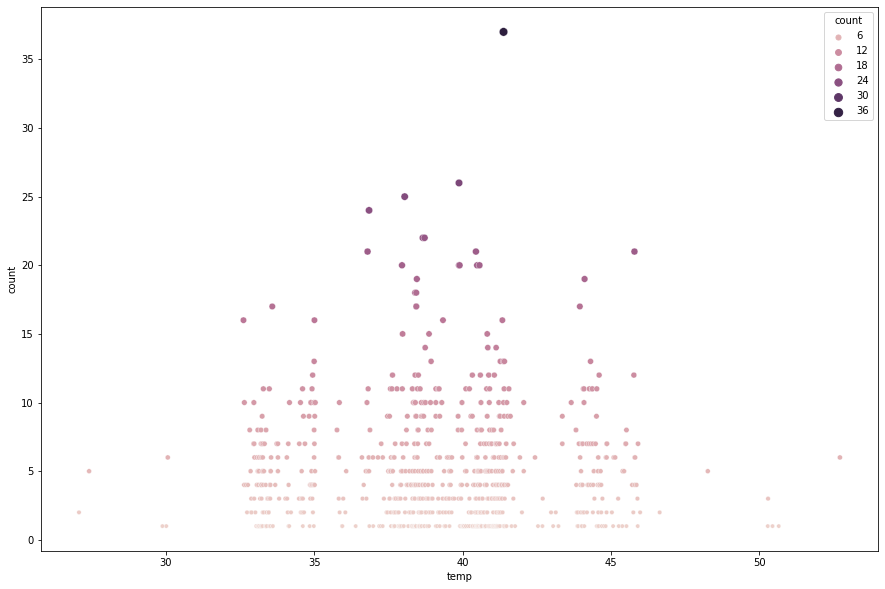

In [ ]:
tmp_merged_data = merged_data[['temp', 'source', 'time_stamp', 'cab_type', 'destination',
       'surge_multiplier',  'name']]
tmp_merged_data_g =  tmp_merged_data.groupby(["temp", "source"]).size().reset_index()
tmp_merged_data_g.columns = ["temp", "source", "count"]
plt.figure(figsize=(15, 10))
sns.scatterplot( data = tmp_merged_data_g, x ="temp", y = "count", size="count", hue="count");

understanding count and rain effect

In [ ]:
rain_merged_data = merged_data[['source', 'time_stamp', 'cab_type',  "rain"]]
len(rain_merged_data)
rain_merged_data.isnull().sum()

source           0
time_stamp       0
cab_type         0
rain          3457
dtype: int64

In [ ]:
rain_merged_data["rain"] = rain_merged_data["rain"].fillna(value=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


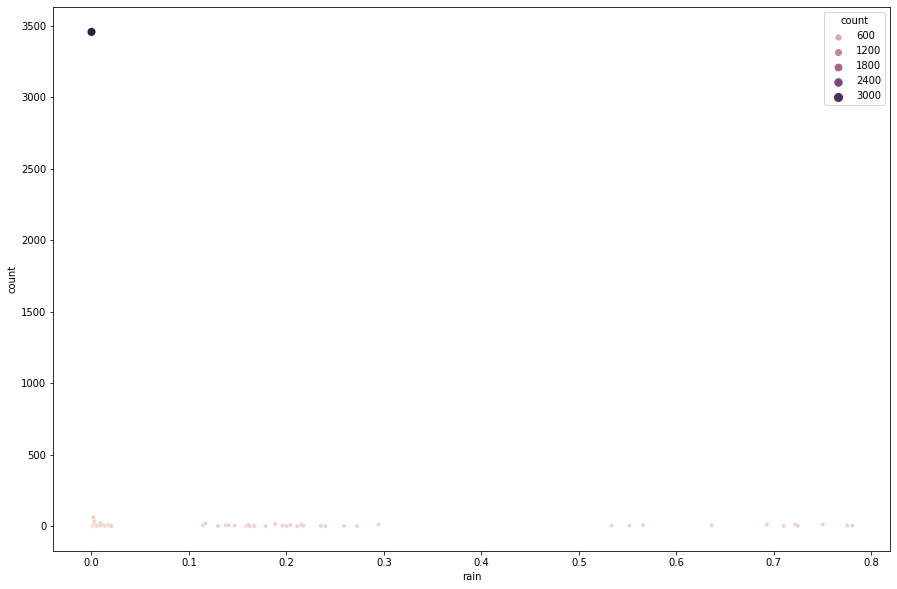

In [ ]:
t_rain = rain_merged_data.groupby(["rain"]).size().reset_index()
t_rain.columns=["rain", "count"]
plt.figure(figsize=(15, 10))
sns.scatterplot(data = t_rain, x = "rain", y="count", hue="count", size="count")

In [ ]:
rain_merged_data.head()

which company get more rides during rain

In [ ]:
only_rain_data = rain_merged_data[rain_merged_data["rain"] != 0]
print(len(only_rain_data))

409


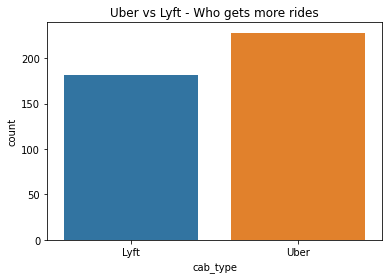

In [ ]:
c_only_rain = only_rain_data.groupby(["cab_type"]).size().reset_index()
c_only_rain.columns = ["cab_type", "count"]
sns.barplot(x ="cab_type", y="count", data=c_only_rain).set_title("Uber vs Lyft - Who gets more rides");